# CodSoft

# Data Science

# TASK 1- Titanic Survival Prediction

## Name: Melissa Dsouza

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [164]:
titanic_data= pd.read_csv("C:/Users/dsouz/OneDrive/Desktop/Internship/Titanic-Dataset.csv")

In [165]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [167]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [168]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Analysis 

<Axes: xlabel='Survived', ylabel='Count'>

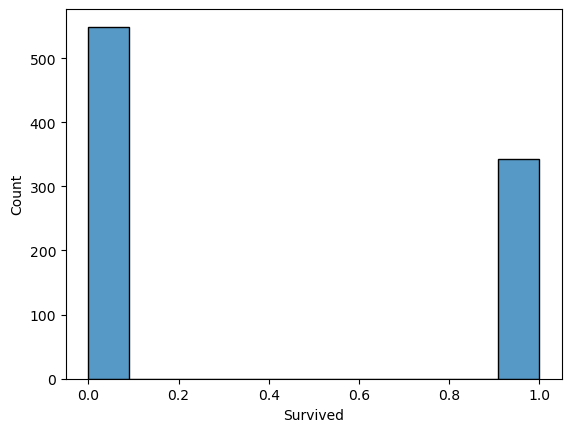

In [169]:
sns.histplot(titanic_data,x='Survived')

Text(0.5, 1.0, 'Pclass wise survival')

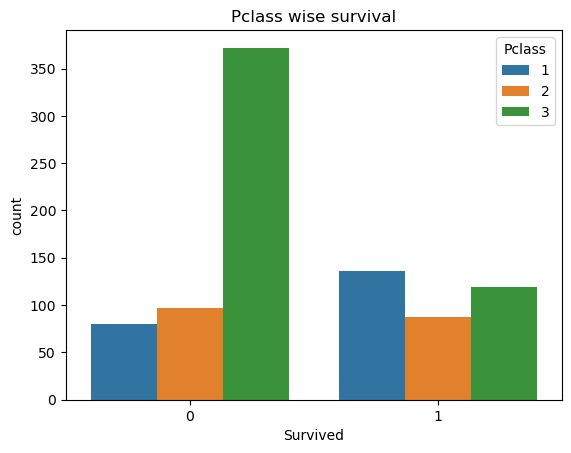

In [170]:
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Pclass'])
plt.title("Pclass wise survival")

Text(0.5, 1.0, 'Age Distribution')

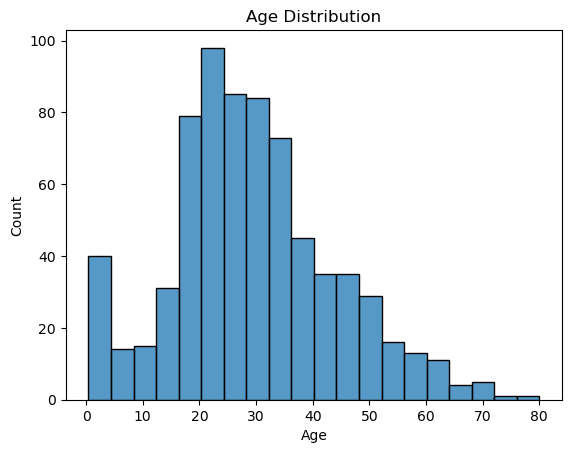

In [171]:
sns.histplot(x=titanic_data["Age"],bins=20)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Number of Siblings/spouses travelling')

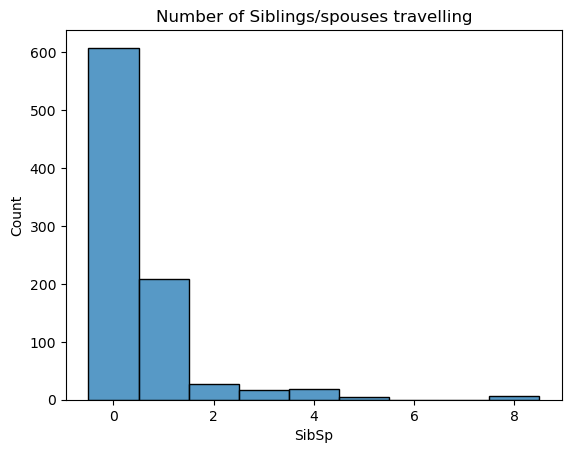

In [172]:
sns.histplot(titanic_data, x='SibSp',discrete=True)
plt.title("Number of Siblings/spouses travelling")

Text(0.5, 1.0, 'Number of Parents/Children travelling')

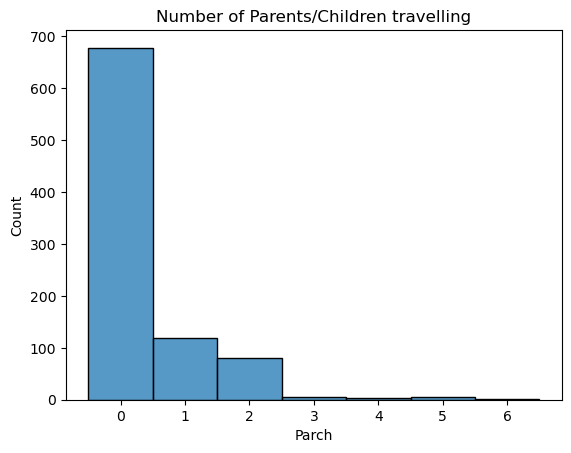

In [173]:
sns.histplot(titanic_data, x='Parch',discrete=True)
plt.title("Number of Parents/Children travelling")

### Data Preprocessing

In [174]:
titanic_data['Age'].fillna(titanic_data["Age"].median(), inplace=True)
titanic_data['Age'].isnull().sum()

0

In [175]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [176]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [177]:
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [178]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace=True)

In [179]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [180]:
titanic_data['Age']=titanic_data['Age'].astype(int)

In [181]:
titanic_data["Sex"]=titanic_data["Sex"].map({"male":1,"female":0})
titanic_data["Embarked"]=titanic_data["Embarked"].map({"S":0,"C":1,"Q":2})

In [182]:
titanic_data['Embarked'].unique

<bound method Series.unique of 0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64>

In [183]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,0


### Data Modelling

In [184]:
X= titanic_data[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
Y=titanic_data['Survived']

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [199]:
from sklearn.linear_model import LogisticRegression

In [200]:
model= LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [209]:
prediction= model.predict(X_test)
prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [208]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(Y_test,prediction)
accuracy

0.8044692737430168

### Result

In [211]:
import warnings
warnings.filterwarnings("ignore")

result=log.predict([[2,0,35,2,0,3]])

if(result==0):
    print("Not survived")
else:
    print("Survived")

Survived
